In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import torch
import torch.nn as nn
import torch.nn.functional as f
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader
from sklearn import preprocessing
from tqdm import tqdm
from sklearn.preprocessing import FunctionTransformer
import seaborn as sns 
from scipy import stats
import statsmodels.api as sm

from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVR
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler
import h2o
from h2o.automl import H2OAutoML
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.neural_network import MLPRegressor
from scipy.stats import norm
import copy
from sklearn.model_selection import KFold
from catboost import CatBoostRegressor, Pool, metrics, cv
import xgboost as xgb
from scipy.stats import gmean
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [27]:
add_train = pd.read_csv('./n_train.csv')
add_test = pd.read_csv('./n_test.csv')

In [28]:
add_train.head(2)

,startdate,year,quarter,month,week,dayofyear,season,day_of_year_sin,day_of_year_cos,week_sin,week_cos,month_sin,month_cos,season_sin,season_cos,quarter_sin,quarter_cos,lat,lon,loc_group,climateregions__climateregion,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,nmme0-tmp2m-34w__gfdlflorb0,nmme0-tmp2m-34w__gfdl0,nmme0-tmp2m-34w__nasa0,nmme0-tmp2m-34w__nmme0mean,contest-wind-h10-14d__wind-hgt-10,nmme-tmp2m-56w__cancm3,nmme-tmp2m-56w__cancm4,nmme-tmp2m-56w__ccsm3,nmme-tmp2m-56w__ccsm4,nmme-tmp2m-56w__cfsv2,nmme-tmp2m-56w__gfdl,nmme-tmp2m-56w__gfdlflora,nmme-tmp2m-56w__gfdlflorb,nmme-tmp2m-56w__nasa,nmme-tmp2m-56w__nmmemean,contest-rhum-sig995-14d__rhum,nmme-prate-34w__cancm3,nmme-prate-34w__cancm4,nmme-prate-34w__ccsm3,nmme-prate-34w__ccsm4,nmme-prate-34w__cfsv2,nmme-prate-34w__gfdl,nmme-prate-34w__gfdlflora,nmme-prate-34w__gfdlflorb,nmme-prate-34w__nasa,nmme-prate-34w__nmmemean,contest-wind-h100-14d__wind-hgt-100,nmme0-prate-56w__cancm30,nmme0-prate-56w__cancm40,nmme0-prate-56w__ccsm30,nmme0-prate-56w__ccsm40,nmme0-prate-56w__cfsv20,nmme0-prate-56w__gfdlflora0,nmme0-prate-56w__gfdlflorb0,nmme0-prate-56w__gfdl0,nmme0-prate-56w__nasa0,nmme0-prate-56w__nmme0mean,nmme0-prate-34w__cancm30,nmme0-prate-34w__cancm40,nmme0-prate-34w__ccsm30,nmme0-prate-34w__ccsm40,nmme0-prate-34w__cfsv20,nmme0-prate-34w__gfdlflora0,nmme0-prate-34w__gfdlflorb0,nmme0-prate-34w__gfdl0,nmme0-prate-34w__nasa0,nmme0-prate-34w__nmme0mean,contest-slp-14d__slp,contest-wind-vwnd-925-14d__wind-vwnd-925,nmme-prate-56w__cancm3,nmme-prate-56w__cancm4,nmme-prate-56w__ccsm3,nmme-prate-56w__ccsm4,nmme-prate-56w__cfsv2,nmme-prate-56w__gfdl,nmme-prate-56w__gfdlflora,nmme-prate-56w__gfdlflorb,nmme-prate-56w__nasa,nmme-prate-56w__nmmemean,contest-pres-sfc-gauss-14d__pres,contest-wind-uwnd-250-14d__wind-uwnd-250,nmme-tmp2m-34w__cancm3,nmme-tmp2m-34w__cancm4,nmme-tmp2m-34w__ccsm3,nmme-tmp2m-34w__ccsm4,nmme-tmp2m-34w__cfsv2,nmme-tmp2m-34w__gfdl,nmme-tmp2m-34w__gfdlflora,nmme-tmp2m-34w__gfdlflorb,nmme-tmp2m-34w__nasa,nmme-tmp2m-34w__nmmemean,contest-prwtr-eatm-14d__prwtr,contest-wind-vwnd-250-14d__wind-vwnd-250,contest-precip-14d__precip,contest-wind-h850-14d__wind-hgt-850,contest-wind-uwnd-925-14d__wind-uwnd-925,contest-wind-h500-14d__wind-hgt-500,cancm30,cancm40,ccsm30,ccsm40,cfsv20,gfdlflora0,gfdlflorb0,gfdl0,nasa0,nmme0mean,elevation__elevation,wind-vwnd-250-2010-1,wind-vwnd-250-2010-2,wind-vwnd-250-2010-3,wind-vwnd-250-2010-4,wind-vwnd-250-2010-5,wind-vwnd-250-2010-6,wind-vwnd-250-2010-7,wind-vwnd-250-2010-8,wind-vwnd-250-2010-9,wind-vwnd-250-2010-10,wind-vwnd-250-2010-11,wind-vwnd-250-2010-12,wind-vwnd-250-2010-13,wind-vwnd-250-2010-14,wind-vwnd-250-2010-15,wind-vwnd-250-2010-16,wind-vwnd-250-2010-17,wind-vwnd-250-2010-18,wind-vwnd-250-2010-19,wind-vwnd-250-2010-20,wind-uwnd-250-2010-1,wind-uwnd-250-2010-2,wind-uwnd-250-2010-3,wind-uwnd-250-2010-4,wind-uwnd-250-2010-5,wind-uwnd-250-2010-6,wind-uwnd-250-2010-7,wind-uwnd-250-2010-8,wind-uwnd-250-2010-9,wind-uwnd-250-2010-10,wind-uwnd-250-2010-11,wind-uwnd-250-2010-12,wind-uwnd-250-2010-13,wind-uwnd-250-2010-14,wind-uwnd-250-2010-15,wind-uwnd-250-2010-16,wind-uwnd-250-2010-17,wind-uwnd-250-2010-18,wind-uwnd-250-2010-19,wind-uwnd-250-2010-20,mjo1d__phase,mjo1d__amplitude,mei__mei,mei__meirank,mei__nip,wind-hgt-850-2010-1,wind-hgt-850-2010-2,wind-hgt-850-2010-3,wind-hgt-850-2010-4,wind-hgt-850-2010-5,wind-hgt-850-2010-6,wind-hgt-850-2010-7,wind-hgt-850-2010-8,wind-hgt-850-2010-9,wind-hgt-850-2010-10,sst-2010-1,sst-2010-2,sst-2010-3,sst-2010-4,sst-2010-5,sst-2010-6,sst-2010-7,sst-2010-8,sst-2010-9,sst-2010-10,wind-hgt-500-2010-1,wind-hgt-500-2010-2,wind-hgt-500-2010-3,wind-hgt-500-2010-4,wind-hgt-500-2010-5,wind-hgt-500-2010-6,wind-hgt-500-2010-7,wind-hgt-500-2010-8,wind-hgt-500-2010-9,wind-hgt-500-2010-10,icec-2010-1,icec-2010-2,icec-2010-3,icec-2010-4,icec-2010-5,icec-2010-6,icec-2010-7,ice

In [29]:
sst_col_list = [c for c in add_train.columns if 'sst' in c]
sst_col_list

['sst-2010-1',
 'sst-2010-2',
 'sst-2010-3',
 'sst-2010-4',
 'sst-2010-5',
 'sst-2010-6',
 'sst-2010-7',
 'sst-2010-8',
 'sst-2010-9',
 'sst-2010-10']

In [30]:
climate_type_dict = {'1':'BSk',
 '9': 'Dfb',
 '4': 'Cfa',
 '7': 'Csb',
 '8': 'Dfa',
 '3': 'BWk',
 '10': 'Dfc',
 '2': 'BWh',
 '6': 'Csa',
 '11': 'Dsb',
 '0': 'BSh',
 '5': 'Cfb',
 '12': 'Dsc',
 '13': 'Dwa',
 '14': 'Dwb'}

In [31]:
all_cols = add_train.columns.tolist()

In [32]:
target=["contest-tmp2m-14d__tmp2m"]

In [33]:
train_df =  pd.read_csv('fe_v1_train.csv')
test_df  =  pd.read_csv('fe_v1_test.csv')
for c in train_df.columns:
    if train_df[c].dtypes != 'float64':
        print(c)

climateregions__climateregion


In [34]:
exclude_cols = ['index', 'startdate']
best_cols = [c for c in train_df.columns if c not in exclude_cols and c not in target]
print("Main features:", len(best_cols))

Main features: 63


In [35]:
train_df[sst_col_list] = add_train[sst_col_list]
test_df[sst_col_list] = add_test[sst_col_list]

In [36]:
train_df['contest-pevpr-sfc-gauss-14d__pevpr'] = add_train['contest-pevpr-sfc-gauss-14d__pevpr']
test_df['contest-pevpr-sfc-gauss-14d__pevpr'] = add_test['contest-pevpr-sfc-gauss-14d__pevpr']

In [37]:
for c in all_cols:
    if 'contest-precip-14d' in c:
        print(c)

contest-precip-14d__precip


In [38]:
add_train['startdate']

0         2014-09-01
1         2014-09-02
2         2014-09-03
3         2014-09-04
4         2014-09-05
             ...    
375729    2016-08-27
375730    2016-08-28
375731    2016-08-29
375732    2016-08-30
375733    2016-08-31
Name: startdate, Length: 375734, dtype: object

In [39]:
def calculate_season(month):
    if month == 12 or month == 1 or month == 2:
        return 4
    if month == 9 or month == 10 or month == 11:
        return 3
    if month == 7 or month == 8 or month == 6:
        return 2
    if month == 3 or month == 4 or month == 5:
        return 1

In [40]:
train_df['month'] = add_train['month']
test_df['month'] = add_test['month']

train_df['season'] = train_df['month'].apply(calculate_season)
test_df['season'] = test_df['month'].apply(calculate_season)

train_df['loc_group'] = add_train['loc_group']
test_df['loc_group'] = add_test['loc_group']

train_df['year'] = add_train['year']
test_df['year'] = add_test['year']

def map_climate_type(x):
    return climate_type_dict[str(x)]

train_df['climate_type'] = train_df['climateregions__climateregion'].apply(map_climate_type)
test_df['climate_type'] = train_df['climateregions__climateregion'].apply(map_climate_type)

precip_col = 'contest-precip-14d__precip'
wind_col = 'contest-wind-h500-14d__wind-hgt-500'

group_cols = ['loc_group', 'climate_type', 'year', 'season', 'month']
season_group_cols = ['loc_group', 'climate_type', 'year', 'season']


In [41]:
# def calculate_year(month, year):
#     if (month == 1 or month == 2):
#         return year - 1
#     return year
# train_df['year'] = train_df.apply(lambda x: calculate_year(x['month'], x['year']), axis=1)


In [42]:
slp_col = 'contest-slp-14d__slp'
ccsm3_col = 'nmme-tmp2m-34w__ccsm3'
pres_col = 'contest-pres-sfc-gauss-14d__pres'
precip_col = 'contest-precip-14d__precip'
poten_col = 'contest-pevpr-sfc-gauss-14d__pevpr'
rhum_col = 'contest-rhum-sig995-14d__rhum'
elevation_col = 'elevation__elevation'

In [43]:
R_earth = 6371.009 * 1000
def cal_acceleration(elevation):
    return 9.80665 * (R_earth / (elevation + R_earth)) * (R_earth / (elevation + R_earth))

In [44]:
train_df['acceleration'] = train_df[elevation_col].apply(cal_acceleration)
test_df['acceleration'] = test_df[elevation_col].apply(cal_acceleration)

In [45]:
# apply(lambda x: cal_absolute_t(x[pres_col], x[slp_col], x[elevation_col], x['acceleration']), axis=1)

In [46]:
constant = (28.9647) / (6.023 * 1000 * 1.38066)
import math
def cal_absolute_t(p_high, p_low, elevation, acceleration):
    x = math.log(p_low / p_high)
    g_h = elevation * acceleration
    return g_h * constant / x

In [47]:
train_df['my_pres'] = train_df.apply(lambda x: cal_absolute_t(x[pres_col], x[slp_col], x[elevation_col], x['acceleration']), axis=1)
test_df['my_pres'] = test_df.apply(lambda x: cal_absolute_t(x[pres_col], x[slp_col], x[elevation_col], x['acceleration']), axis=1)


In [48]:
(train_df[slp_col] / train_df[pres_col]).min()

0.9979020034466598

In [49]:
train_df['my_t'] = train_df.apply(lambda x: cal_absolute_t(x[pres_col], x[slp_col], x[elevation_col], x['acceleration']), axis=1)
test_df['my_t'] = test_df.apply(lambda x: cal_absolute_t(x[pres_col], x[slp_col], x[elevation_col], x['acceleration']), axis=1)


<AxesSubplot:>

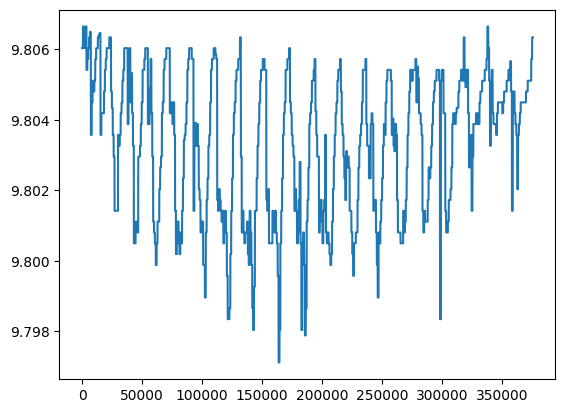

In [52]:
train_df['acceleration'].plot()

In [53]:
print(train_df[elevation_col].min(), train_df[elevation_col].max())
print(test_df[elevation_col].min(), test_df[elevation_col].max())

0.0 3100.0
0.0 3100.0


In [54]:
print(train_df[rhum_col].min(), train_df[rhum_col].max())
print(test_df[rhum_col].min(), test_df[rhum_col].max())

13.25 98.22
21.87 93.08


In [55]:
print(train_df[poten_col].min(), train_df[poten_col].max())
print(test_df[poten_col].min(), test_df[poten_col].max())

-2.31 1185.14
32.82 740.17


In [56]:
print(train_df[pres_col].min(), train_df[pres_col].max())
print(test_df[pres_col].min(), test_df[pres_col].max())

74839.94 102845.57
75925.02 102119.93


In [57]:
print(train_df[stt_col].min(), train_df[stt_col].max())
print(test_df[stt_col].min(), test_df[stt_col].max())

-219.87 352.2
89.73 345.33


In [58]:
print(train_df[sst_col_5].min(), train_df[sst_col_5].max())
print(test_df[sst_col_5].min(), test_df[sst_col_5].max())

-32.81 40.97
-4.62 21.5


In [59]:
print(train_df[precip_col].min(), train_df[precip_col].max())
print(test_df[precip_col].min(), test_df[precip_col].max())

0.0 502.63
0.0 439.54


In [60]:
# train_df[pres_col] = train_df[pres_col] - 100000
# test_df[pres_col] = test_df[pres_col] - 100000

In [61]:
print(train_df[slp_col].min(), train_df[slp_col].max())
print(test_df[slp_col].min(), test_df[slp_col].max())

100379.21 103275.84
100593.22 102258.27


In [62]:
print(train_df[wind_col].min(), train_df[wind_col].max())
print(test_df[wind_col].min(), test_df[wind_col].max())

5289.25 5958.2
5504.59 5925.56


In [63]:
train_df[wind_col] = train_df[wind_col] - 5000
test_df[wind_col] = test_df[wind_col] - 5000

In [64]:
train_df[slp_col] = train_df[slp_col] - 100000
test_df[slp_col] = test_df[slp_col] - 100000

In [65]:
check_cols = [c for c in train_df.columns if c not in target and c not in exclude_cols]

df = pd.concat([train_df[check_cols], test_df[check_cols]], axis=0)
df.shape

(407088, 78)

In [66]:
def create_df_by_group_and_agg(dataframe, grouped_cols, action, my_col, return_name):
    if action == "first":
        ans_df = dataframe.groupby(grouped_cols)[my_col].first().reset_index()
    elif action == "min":
        ans_df = dataframe.groupby(grouped_cols)[my_col].min().reset_index()
    elif action == "max":
        ans_df = dataframe.groupby(grouped_cols)[my_col].max().reset_index()
    elif action == "mean":
        ans_df = dataframe.groupby(grouped_cols)[my_col].mean().reset_index()
    print("Nan")
    ans_df = ans_df.rename(columns={my_col: return_name})
    for c in ans_df.columns:
        if ans_df[c].isnull().sum() > 0:
            print(c, ans_df[c].isnull().sum())
    return ans_df

In [67]:
def assign_train_test_df(my_col):
    train_df[my_col] = df[:len(train_df)][my_col].tolist()
    test_df[my_col] = df[len(train_df):][my_col].tolist()

In [68]:
first_slp_df = create_df_by_group_and_agg(df, season_group_cols, "first", slp_col, "first_slp")
first_slp_df.head(3)

Nan


,loc_group,climate_type,year,season,first_slp
0,0,BSh,2014,3,1352.08
1,0,BSh,2014,4,2072.81
2,0,BSh,2015,1,1917.24


In [69]:
mean_slp_df = create_df_by_group_and_agg(df, season_group_cols, "mean", slp_col, "mean_slp")
mean_slp_df.head(3)

Nan


,loc_group,climate_type,year,season,mean_slp
0,0,BSh,2014,3,1642.992088
1,0,BSh,2014,4,1916.129677
2,0,BSh,2015,1,1386.816413


In [70]:
first_wind_df = create_df_by_group_and_agg(df, season_group_cols, "first", wind_col, "first_wind")
first_wind_df.head(3)

Nan


,loc_group,climate_type,year,season,first_wind
0,0,BSh,2014,3,899.66
1,0,BSh,2014,4,847.35
2,0,BSh,2015,1,804.47


In [71]:
first_poten_df = create_df_by_group_and_agg(df, season_group_cols, "first", poten_col, "first_poten")
first_poten_df.head(3)

Nan


,loc_group,climate_type,year,season,first_poten
0,0,BSh,2014,3,237.00
1,0,BSh,2014,4,123.22
2,0,BSh,2015,1,147.22


In [72]:
first_precip_df = create_df_by_group_and_agg(df, season_group_cols, "first", precip_col, "first_precip")
first_precip_df.head(3)

Nan


,loc_group,climate_type,year,season,first_precip
0,0,BSh,2014,3,94.31
1,0,BSh,2014,4,25.53
2,0,BSh,2015,1,31.94


In [73]:
mean_precip_df = create_df_by_group_and_agg(df, season_group_cols, "mean", precip_col, "mean_precip")
mean_precip_df.head(3)

Nan


,loc_group,climate_type,year,season,mean_precip
0,0,BSh,2014,3,40.199560
1,0,BSh,2014,4,25.006129
2,0,BSh,2015,1,59.785326


In [74]:
first_ccsm3_df = create_df_by_group_and_agg(df, season_group_cols, "first", ccsm3_col, "first_ccsm3")
first_ccsm3_df.head(3)

Nan


,loc_group,climate_type,year,season,first_ccsm3
0,0,BSh,2014,3,27.57
1,0,BSh,2014,4,6.66
2,0,BSh,2015,1,15.25


In [75]:
first_pres_df = create_df_by_group_and_agg(df, season_group_cols, "first", ccsm3_col, "first_pres")
first_pres_df.head(3)

Nan


,loc_group,climate_type,year,season,first_pres
0,0,BSh,2014,3,27.57
1,0,BSh,2014,4,6.66
2,0,BSh,2015,1,15.25


In [76]:
def assign_train_test_sst_df(df, my_col):
    train_df[my_col] = df[:len(train_df)][my_col].tolist()
    test_df[my_col] = df[len(train_df):][my_col].tolist()
    return df


def create_sst_feature(df, sst_col_name, suffix_num, season_group_cols):
    first_df = create_df_by_group_and_agg(df, season_group_cols, "first", sst_col_name, f"first_sst_{suffix_num}")
    min_df = create_df_by_group_and_agg(df, season_group_cols, "min", sst_col_name, f"min_sst_{suffix_num}")
    max_df = create_df_by_group_and_agg(df, season_group_cols, "max", sst_col_name, f"max_sst_{suffix_num}")
    
    df = df.merge(first_df, how='left', on=season_group_cols)
    df[f'diff_sst_{suffix_num}_first'] = df[sst_col_name] - df[f"first_sst_{suffix_num}"]
    print("Bug: ", df[f'diff_sst_{suffix_num}_first'].isnull().sum())
    df = assign_train_test_sst_df(df, f'diff_sst_{suffix_num}_first')
    
    df = df.merge(min_df, how='left', on=season_group_cols)
    df[f'diff_sst_{suffix_num}_min'] = df[sst_col_name] - df[f"min_sst_{suffix_num}"]
    df = assign_train_test_sst_df(df, f'diff_sst_{suffix_num}_min')
    
    df = df.merge(max_df, how='left', on=season_group_cols)
    df[f'diff_sst_{suffix_num}_max'] = df[sst_col_name] - df[f"max_sst_{suffix_num}"]
    df = assign_train_test_sst_df(df, f'diff_sst_{suffix_num}_max')
    
    df[f'range_sst_{suffix_num}'] = df[f"max_sst_{suffix_num}"] - df[f"min_sst_{suffix_num}"]
    df = assign_train_test_sst_df(df, f'range_sst_{suffix_num}')
    
    df[f'scale_sst_{suffix_num}'] = (df[sst_col_name] - df[f'diff_sst_{suffix_num}_min']) / df[f'range_sst_{suffix_num}']
    df = assign_train_test_sst_df(df, f'scale_sst_{suffix_num}')
    
    return [df, f'diff_sst_{suffix_num}_first',
    f'diff_sst_{suffix_num}_min',
    f'diff_sst_{suffix_num}_max',
    f'range_sst_{suffix_num}', f'scale_sst_{suffix_num}']
    


In [77]:
def create_sst_month_feature(df, sst_col_name, suffix_num, group_cols):
    first_df = create_df_by_group_and_agg(df, group_cols, "first", sst_col_name, f"first_sst_{suffix_num}_month")
    min_df = create_df_by_group_and_agg(df, group_cols, "min", sst_col_name, f"min_sst_{suffix_num}_month")
    max_df = create_df_by_group_and_agg(df, group_cols, "max", sst_col_name, f"max_sst_{suffix_num}_month")
    
    df = df.merge(first_df, how='left', on=group_cols)
    df[f'diff_sst_{suffix_num}_first_month'] = df[sst_col_name] - df[f"first_sst_{suffix_num}_month"]
    print("Bug: ", df[f'diff_sst_{suffix_num}_first_month'].isnull().sum())
    df = assign_train_test_sst_df(df, f'diff_sst_{suffix_num}_first_month')
    
    df = df.merge(min_df, how='left', on=group_cols)
    df[f'diff_sst_{suffix_num}_min_month'] = df[sst_col_name] - df[f"min_sst_{suffix_num}_month"]
    df = assign_train_test_sst_df(df, f'diff_sst_{suffix_num}_min_month')
    
    df = df.merge(max_df, how='left', on=group_cols)
    df[f'diff_sst_{suffix_num}_max_month'] = df[sst_col_name] - df[f"max_sst_{suffix_num}_month"]
    df = assign_train_test_sst_df(df, f'diff_sst_{suffix_num}_max_month')
    
    df[f'range_sst_{suffix_num}_month'] = df[f"max_sst_{suffix_num}_month"] - df[f"min_sst_{suffix_num}_month"]
    df = assign_train_test_sst_df(df, f'range_sst_{suffix_num}_month')
    
#     df[f'scale_sst_{suffix_num}_month'] = (df[sst_col_name] - df[f'diff_sst_{suffix_num}_min_month']) / df[f'range_sst_{suffix_num}_month']
#     df = assign_train_test_sst_df(df, f'scale_sst_{suffix_num}_month')
    
    return [df, f'diff_sst_{suffix_num}_first_month',
    f'diff_sst_{suffix_num}_min_month',
    f'diff_sst_{suffix_num}_max_month',
    f'range_sst_{suffix_num}_month', 
#     f'scale_sst_{suffix_num}_month'
    ]
    

In [78]:
# first_sst_df = create_df_by_group_and_agg(df, season_group_cols, "first", stt_col, "first_sst")
# first_sst_df.head(3)

In [79]:
# first_sst_5_df = create_df_by_group_and_agg(df, season_group_cols, "first", sst_col_5, "first_sst_5")
# first_sst_5_df.head(3)

In [80]:
# first_sst_3_df = create_df_by_group_and_agg(df, season_group_cols, "first", sst_col_3, "first_sst_3")
# first_sst_3_df.head(3)

In [81]:
# first_sst_4_df = create_df_by_group_and_agg(df, season_group_cols, "first", sst_col_4, "first_sst_4")
# first_sst_4_df.head(3)

In [82]:
# min_sst_df = create_df_by_group_and_agg(df, season_group_cols, "min", stt_col, "min_sst")
# min_sst_df.head(3)

In [83]:
# min_sst_5_df = create_df_by_group_and_agg(df, season_group_cols, "min", sst_col_5, "min_sst_5")
# min_sst_5_df.head(3)

In [84]:
# min_sst_3_df = create_df_by_group_and_agg(df, season_group_cols, "min", sst_col_3, "min_sst_3")
# min_sst_3_df.head(3)

In [85]:
# min_sst_4_df = create_df_by_group_and_agg(df, season_group_cols, "min", sst_col_4, "min_sst_4")
# min_sst_4_df.head(3)

In [86]:
# max_sst_df = create_df_by_group_and_agg(df, season_group_cols, "max", stt_col, "max_sst")
# max_sst_df.head(3)

In [87]:
# max_sst_5_df = create_df_by_group_and_agg(df, season_group_cols, "max", sst_col_5, "max_sst_5")
# max_sst_5_df.head(3)

In [88]:
# max_sst_3_df = create_df_by_group_and_agg(df, season_group_cols, "max", sst_col_3, "max_sst_3")
# max_sst_3_df.head(3)

In [89]:
# max_sst_4_df = create_df_by_group_and_agg(df, season_group_cols, "max", sst_col_4, "max_sst_4")
# max_sst_4_df.head(3)

In [90]:
first_slp_df_month = create_df_by_group_and_agg(df, group_cols, "first", slp_col, "first_slp_month")
first_slp_df_month.head(3)

Nan


,loc_group,climate_type,year,season,month,first_slp_month
0,0,BSh,2014,3,9,1352.08
1,0,BSh,2014,3,10,1254.96
2,0,BSh,2014,3,11,1952.19


In [91]:
df = df.merge(first_slp_df, how='left', on=season_group_cols)
df['diff_slp_first'] = df[slp_col] - df['first_slp']
assign_train_test_df('diff_slp_first')

In [92]:
df = df.merge(first_poten_df, how='left', on=season_group_cols)
df['diff_poten_first'] = df[poten_col] - df['first_poten']
assign_train_test_df('diff_poten_first')

In [93]:
df = df.merge(mean_slp_df, how='left', on=season_group_cols)
df['diff_slp_mean'] = df[slp_col] - df['mean_slp']
assign_train_test_df('diff_slp_mean')

In [94]:
df = df.merge(first_precip_df, how='left', on=season_group_cols)
df['diff_precip_first'] = df[precip_col] - df['first_precip']
assign_train_test_df('diff_precip_first')

In [95]:
df = df.merge(mean_precip_df, how='left', on=season_group_cols)
df['diff_precip_mean'] = df[precip_col] - df['mean_precip']
assign_train_test_df('diff_precip_mean')

In [96]:
# df = df.merge(first_sst_df, how='left', on=season_group_cols)
# df['diff_sst_first'] = df[stt_col] - df['first_sst']
# assign_train_test_df('diff_sst_first')

In [97]:
# df = df.merge(first_sst_5_df, how='left', on=season_group_cols)
# df['diff_sst_5_first'] = df[sst_col_5] - df['first_sst_5']
# assign_train_test_df('diff_sst_5_first')

In [98]:
# df = df.merge(first_sst_3_df, how='left', on=season_group_cols)
# df['diff_sst_3_first'] = df[sst_col_3] - df['first_sst_3']
# assign_train_test_df('diff_sst_3_first')

In [99]:
# df = df.merge(first_sst_4_df, how='left', on=season_group_cols)
# df['diff_sst_4_first'] = df[sst_col_4] - df['first_sst_4']
# assign_train_test_df('diff_sst_4_first')

In [100]:
# df = df.merge(min_sst_df, how='left', on=season_group_cols)
# df['diff_sst_min'] = df[stt_col] - df['min_sst']
# assign_train_test_df('diff_sst_min')

In [101]:
# df = df.merge(max_sst_df, how='left', on=season_group_cols)
# df['diff_sst_max'] = df['max_sst'] - df[stt_col]
# assign_train_test_df('diff_sst_max')

In [102]:
# df = df.merge(max_sst_5_df, how='left', on=season_group_cols)
# df['diff_sst_5_max'] = df[sst_col_5] - df['max_sst_5']
# assign_train_test_df('diff_sst_5_max')

In [103]:
# df = df.merge(max_sst_3_df, how='left', on=season_group_cols)
# df['diff_sst_3_max'] = df[sst_col_3] - df['max_sst_3']
# assign_train_test_df('diff_sst_3_max')

In [104]:
# df = df.merge(max_sst_4_df, how='left', on=season_group_cols)
# df['diff_sst_4_max'] = df[sst_col_4] - df['max_sst_4']
# assign_train_test_df('diff_sst_4_max')

In [105]:
# df = df.merge(min_sst_5_df, how='left', on=season_group_cols)
# df['diff_sst_5_min'] = df[sst_col_5] - df['min_sst_5']
# assign_train_test_df('diff_sst_5_min')

In [106]:
# df = df.merge(min_sst_3_df, how='left', on=season_group_cols)
# df['diff_sst_3_min'] = df[sst_col_3] - df['min_sst_3']
# assign_train_test_df('diff_sst_3_min')

In [107]:
# df = df.merge(min_sst_4_df, how='left', on=season_group_cols)
# df['diff_sst_4_min'] = df[sst_col_3] - df['min_sst_4']
# assign_train_test_df('diff_sst_4_min')

In [108]:
df = df.merge(first_pres_df, how='left', on=season_group_cols)
df['diff_pres_first'] = df[pres_col] - df['first_pres']
assign_train_test_df('diff_pres_first')

In [109]:
df = df.merge(first_wind_df, how='left', on=season_group_cols)
df['diff_wind_first'] = df[wind_col] - df['first_wind']
assign_train_test_df('diff_wind_first')

In [110]:
df = df.merge(first_ccsm3_df, how='left', on=season_group_cols)
df['diff_ccsm3_first'] = df[ccsm3_col] - df['first_ccsm3']
assign_train_test_df('diff_ccsm3_first')

In [111]:
# df[f'{precip_col}_bins'] = pd.qcut(df[precip_col], q=5, labels=[f'{precip_col}_{i}' for i in range(5)])
# le = LabelEncoder().fit(np.unique(df[f'{precip_col}_bins'].unique().tolist()))
# df[f'{precip_col}_bins'] = le.transform(df[f'{precip_col}_bins']) + 1
# df[f'{precip_col}_bins'] = df[f'{precip_col}_bins'].replace(np.nan, 0).astype('int').astype('category')
# assign_train_test_df(f'{precip_col}_bins')

In [112]:
# df['range_sst'] = df['max_sst'] - df['min_sst']
# assign_train_test_df('range_sst')

In [113]:
# df['range_sst_5'] = df['max_sst_5'] - df['min_sst_5']
# assign_train_test_df('range_sst_5')

In [114]:
# df['range_sst_3'] = df['max_sst_3'] - df['min_sst_3']
# assign_train_test_df('range_sst_3')

In [115]:
# df['range_sst_4'] = df['max_sst_4'] - df['min_sst_4']
# assign_train_test_df('range_sst_4')

In [116]:
sst_col_list

['sst-2010-1',
 'sst-2010-2',
 'sst-2010-3',
 'sst-2010-4',
 'sst-2010-5',
 'sst-2010-6',
 'sst-2010-7',
 'sst-2010-8',
 'sst-2010-9',
 'sst-2010-10']

In [117]:
sst_10_res = create_sst_feature(df, 'sst-2010-10', 10, season_group_cols)
df = sst_10_res[0]
sst_feature_10 = sst_10_res[1:]

sst_9_res = create_sst_feature(df, 'sst-2010-9', 9, season_group_cols)
df = sst_9_res[0]
sst_feature_9 = sst_9_res[1:]

sst_8_res = create_sst_feature(df, 'sst-2010-8', 8, season_group_cols)
df = sst_8_res[0]
sst_feature_8 = sst_8_res[1:]

sst_7_res = create_sst_feature(df, 'sst-2010-7', 7, season_group_cols)
df = sst_7_res[0]
sst_feature_7 = sst_7_res[1:]

sst_6_res = create_sst_feature(df, 'sst-2010-6', 6, season_group_cols)
df = sst_6_res[0]
sst_feature_6 = sst_6_res[1:]

sst_1_res = create_sst_feature(df, 'sst-2010-1', 1, season_group_cols)
df = sst_1_res[0]
sst_feature_1 = sst_1_res[1:]

sst_3_res = create_sst_feature(df, 'sst-2010-3', 3, season_group_cols)
df = sst_3_res[0]
sst_feature_3 = sst_3_res[1:]

sst_2_res = create_sst_feature(df, 'sst-2010-2', 2, season_group_cols)
df = sst_2_res[0]
sst_feature_2 = sst_2_res[1:]


sst_4_res = create_sst_feature(df, 'sst-2010-4', 4, season_group_cols)
df = sst_4_res[0]
sst_feature_4 = sst_4_res[1:]


sst_5_res = create_sst_feature(df, 'sst-2010-5', 5, season_group_cols)
df = sst_5_res[0]
sst_feature_5 = sst_5_res[1:]


Nan
Nan
Nan
Bug:  0
Nan
Nan
Nan
Bug:  0
Nan
Nan
Nan
Bug:  0
Nan
Nan
Nan
Bug:  0
Nan
Nan
Nan
Bug:  0
Nan
Nan
Nan
Bug:  0
Nan
Nan
Nan
Bug:  0
Nan
Nan
Nan
Bug:  0
Nan
Nan
Nan
Bug:  0
Nan
Nan
Nan
Bug:  0


/data/hieunm/anaconda3/envs/wids-env/lib/python3.7/site-packages/ipykernel_launcher.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/data/hieunm/anaconda3/envs/wids-env/lib/python3.7/site-packages/ipykernel_launcher.py:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


In [118]:
# sst_10_res_month = create_sst_month_feature(df, 'sst-2010-10', 10, group_cols)
# df = sst_10_res_month[0]
# sst_feature_10_month = sst_10_res_month[1:]

# sst_9_res_month = create_sst_month_feature(df, 'sst-2010-9', 9, group_cols)
# df = sst_9_res_month[0]
# sst_feature_9_month = sst_9_res_month[1:]

# sst_8_res_month = create_sst_month_feature(df, 'sst-2010-8', 8, group_cols)
# df = sst_8_res_month[0]
# sst_feature_8_month = sst_8_res_month[1:]

# sst_7_res_month = create_sst_month_feature(df, 'sst-2010-7', 7, group_cols)
# df = sst_7_res_month[0]
# sst_feature_7_month = sst_7_res_month[1:]

# sst_6_res_month = create_sst_month_feature(df, 'sst-2010-6', 6, group_cols)
# df = sst_6_res_month[0]
# sst_feature_6_month = sst_6_res_month[1:]

# sst_1_res_month = create_sst_month_feature(df, 'sst-2010-1', 1, group_cols)
# df = sst_1_res_month[0]
# sst_feature_1_month = sst_1_res_month[1:]

# sst_3_res_month = create_sst_month_feature(df, 'sst-2010-3', 3, group_cols)
# df = sst_3_res_month[0]
# sst_feature_3_month = sst_3_res_month[1:]

# sst_2_res_month = create_sst_month_feature(df, 'sst-2010-2', 2, group_cols)
# df = sst_2_res_month[0]
# sst_feature_2_month = sst_2_res_month[1:]


# sst_4_res_month = create_sst_month_feature(df, 'sst-2010-4', 4, group_cols)
# df = sst_4_res_month[0]
# sst_feature_4_month = sst_4_res_month[1:]


# sst_5_res_month = create_sst_month_feature(df, 'sst-2010-5', 5, group_cols)
# df = sst_5_res_month[0]
# sst_feature_5_month = sst_5_res_month[1:]


In [119]:
best_cols

['contest-wind-h500-14d__wind-hgt-500',
 'contest-slp-14d__slp',
 'nmme-tmp2m-34w__ccsm3',
 'elevation__elevation',
 'lon',
 'contest-prwtr-eatm-14d__prwtr',
 'lat',
 'climateregions__climateregion',
 'contest-pres-sfc-gauss-14d__pres',
 'season_sin',
 'day_of_year_sin',
 'contest-precip-14d__precip',
 'contest-wind-uwnd-250-14d__wind-uwnd-250',
 'nmme-prate-34w__cfsv2',
 'nmme-prate-34w__nasa',
 'nmme-prate-56w__gfdlflora',
 'wind-uwnd-250-2010-7',
 'contest-wind-vwnd-925-14d__wind-vwnd-925',
 'nmme-prate-34w__nmmemean',
 'nmme0-prate-34w__ccsm30',
 'contest-wind-h850-14d__wind-hgt-850',
 'contest-wind-uwnd-925-14d__wind-uwnd-925',
 'nmme0-prate-56w__cfsv20',
 'nmme-prate-34w__cancm3',
 'contest-rhum-sig995-14d__rhum',
 'nmme-prate-34w__gfdlflorb',
 'wind-hgt-850-2010-4',
 'contest-wind-vwnd-250-14d__wind-vwnd-250',
 'wind-hgt-100-2010-2',
 'wind-uwnd-250-2010-18',
 'wind-hgt-10-2010-5',
 'wind-uwnd-250-2010-15',
 'wind-uwnd-250-2010-4',
 'nmme0-prate-56w__nasa0',
 'nmme0-prate-34w__c

In [120]:
sst_col_list

['sst-2010-1',
 'sst-2010-2',
 'sst-2010-3',
 'sst-2010-4',
 'sst-2010-5',
 'sst-2010-6',
 'sst-2010-7',
 'sst-2010-8',
 'sst-2010-9',
 'sst-2010-10']

In [139]:
sst_lag_cols = []
for col in ['sst-2010-1']:
    suffix = col[-1]
    for lag in [1, 2, 3, 4, 7]:
        df[f'sst_{suffix}_lag_{lag}'] = df.groupby(season_group_cols)[col].shift(lag)
        assign_train_test_df(f'sst_{suffix}_lag_{lag}')
        sst_lag_cols.append(f'sst_{suffix}_lag_{lag}')
sst_lag_cols


/data/hieunm/anaconda3/envs/wids-env/lib/python3.7/site-packages/ipykernel_launcher.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  """


['sst_1_lag_1', 'sst_1_lag_2', 'sst_1_lag_3', 'sst_1_lag_4', 'sst_1_lag_7']

In [ ]:
wind_lag_cols = []
for lag in [1, 2, 3]:
    df[f'wind_lag_{lag}'] = df.groupby(season_group_cols)[wind_col].shift(lag)
    assign_train_test_df(f'wind_lag_{lag}')
    wind_lag_cols.append(f'wind_lag_{lag}')

In [ ]:
precip_lag_cols = []
for lag in [1, 2, 3]:
    df[f'precip_lag_{lag}'] = df.groupby(season_group_cols)[precip_col].shift(lag)
    assign_train_test_df(f'precip_lag_{lag}')
    wind_lag_cols.append(f'precip_lag_{lag}')

In [140]:
features = best_cols + sst_lag_cols + [
    'diff_slp_first',
    'diff_wind_first',
    'diff_precip_first',
#     'diff_poten_first',
#     'acceleration',
#     'diff_sst_first',
#     'diff_sst_min',
#     'diff_sst_max',
#     'range_sst',
#     'diff_sst_5_first',
#     'diff_sst_5_min',
#     'diff_sst_5_max',
#     'range_sst_5',
#     'diff_sst_3_first',
#     'diff_sst_3_min',
#     'diff_sst_3_max',
#     'range_sst_3',
#     'diff_sst_4_first',
#     'diff_sst_4_min',
#     'diff_sst_4_max',
#     'range_sst_4'
] + sst_feature_10 + sst_feature_9 + sst_feature_8 + sst_feature_7 + sst_feature_6 + sst_feature_1 + sst_feature_2 + sst_feature_3 + sst_feature_4 + sst_feature_5

# + sst_feature_3_month + sst_feature_4_month + sst_feature_5_month

# ] + sst_feature_10 + sst_feature_9 + sst_feature_8 + sst_feature_7 + sst_feature_6 + sst_feature_1 + sst_feature_2 + sst_feature_3 + sst_feature_4 + sst_feature_5+ sst_feature_10_month + sst_feature_9_month + sst_feature_8_month + sst_feature_7_month + sst_feature_6_month + sst_feature_1_month + sst_feature_2_month + sst_feature_3_month + sst_feature_4_month + sst_feature_5_month

In [141]:
len(features)

121

In [ ]:
X = train_df[features].values
y = train_df[target[0]].values

skf = KFold(n_splits=5, random_state=2048, shuffle=True)
skf.get_n_splits(X, y)

train_index_list = []
test_index_list = []
train_x_list = []
val_x_list = []
train_y_list = []
val_y_list = []

for i, (train_index, test_index) in tqdm(enumerate(skf.split(X, y))):
    train_index_list.append(train_index)
    test_index_list.append(test_index)

    train_x_list.append(X[train_index, :])
    val_x_list.append(X[test_index, :])
    train_y_list.append(y[train_index])
    val_y_list.append(y[test_index])    
def train_catboost(x, y):
    print(x.shape, y.shape)
    
    cat_models = []
    for i in tqdm(range(5)):
        train_x, val_x = train_x_list[i], val_x_list[i]
        train_y, val_y = train_y_list[i], val_y_list[i]
        clf = CatBoostRegressor(iterations=5000, verbose=200, task_type="GPU",
                           devices='0:1')
        clf.fit(train_x, train_y, eval_set=[(val_x, val_y)], verbose=200, early_stopping_rounds=100)
        cat_models.append(clf)
    
    return cat_models
cat_models = train_catboost(X, y)

preds = []
for cat_model in tqdm(cat_models):
    preds.append(cat_model.predict(test_df[features].values))
s = 0
for pred in preds:
    s += pred
s = s/5
res_df = pd.read_csv('./sample_solution.csv')
res_df['contest-tmp2m-14d__tmp2m'] = s
res_df.to_csv('submission_fe_v4.csv', index=False)

best_df = pd.read_csv('best_sub.csv')
y_best = best_df[target[0]].values

from numpy import dot
from numpy.linalg import norm

cos_sim = dot(y_best, s)/(norm(y_best)*norm(s))
print("cos_sim with best submission:", cos_sim)

5it [00:03,  1.30it/s]


(375734, 121) (375734,)


  0%|                                                                                                | 0/5 [00:00<?, ?it/s]

Learning rate set to 0.072699
0:	learn: 9.2611105	test: 9.2407165	best: 9.2407165 (0)	total: 6.39ms	remaining: 32s
200:	learn: 1.1782014	test: 1.1850287	best: 1.1850287 (200)	total: 1.12s	remaining: 26.8s
400:	learn: 0.9189254	test: 0.9280281	best: 0.9280281 (400)	total: 2.12s	remaining: 24.3s
600:	learn: 0.7928664	test: 0.8044415	best: 0.8044415 (600)	total: 3.16s	remaining: 23.1s
800:	learn: 0.7037345	test: 0.7173246	best: 0.7173246 (800)	total: 4.21s	remaining: 22.1s
1000:	learn: 0.6454504	test: 0.6603271	best: 0.6603271 (1000)	total: 5.22s	remaining: 20.9s
1200:	learn: 0.6007705	test: 0.6170700	best: 0.6170700 (1200)	total: 6.21s	remaining: 19.6s
1400:	learn: 0.5651421	test: 0.5824445	best: 0.5824445 (1400)	total: 7.19s	remaining: 18.5s
1600:	learn: 0.5345774	test: 0.5528710	best: 0.5528710 (1600)	total: 8.18s	remaining: 17.4s
1800:	learn: 0.5101111	test: 0.5293170	best: 0.5293170 (1800)	total: 9.19s	remaining: 16.3s
2000:	learn: 0.4880626	test: 0.5081730	best: 0.5081730 (2000)	tot

 20%|█████████████████▌                                                                      | 1/5 [00:37<02:31, 37.85s/it]

Learning rate set to 0.072699
0:	learn: 9.2537635	test: 9.2717026	best: 9.2717026 (0)	total: 5.81ms	remaining: 29s
200:	learn: 1.1750151	test: 1.1754350	best: 1.1754350 (200)	total: 1.04s	remaining: 24.8s
400:	learn: 0.9228845	test: 0.9257023	best: 0.9257023 (400)	total: 2.05s	remaining: 23.5s
600:	learn: 0.7859486	test: 0.7922627	best: 0.7922627 (600)	total: 3.02s	remaining: 22.1s
800:	learn: 0.7032915	test: 0.7117961	best: 0.7117961 (800)	total: 4.03s	remaining: 21.1s
1000:	learn: 0.6457237	test: 0.6563213	best: 0.6563213 (1000)	total: 5.01s	remaining: 20s
1200:	learn: 0.5980550	test: 0.6096169	best: 0.6096169 (1200)	total: 6.02s	remaining: 19s
1400:	learn: 0.5622415	test: 0.5756210	best: 0.5756210 (1400)	total: 7.03s	remaining: 18.1s
1600:	learn: 0.5335783	test: 0.5482170	best: 0.5482170 (1600)	total: 8.06s	remaining: 17.1s
1800:	learn: 0.5078430	test: 0.5236242	best: 0.5236242 (1800)	total: 9.09s	remaining: 16.1s
2000:	learn: 0.4857045	test: 0.5024653	best: 0.5024653 (2000)	total: 

 40%|███████████████████████████████████▏                                                    | 2/5 [01:15<01:52, 37.63s/it]

Learning rate set to 0.072699
0:	learn: 9.2531718	test: 9.2855747	best: 9.2855747 (0)	total: 6.21ms	remaining: 31.1s
200:	learn: 1.1676855	test: 1.1722250	best: 1.1722250 (200)	total: 1.03s	remaining: 24.7s
400:	learn: 0.9020096	test: 0.9108927	best: 0.9108927 (400)	total: 2.11s	remaining: 24.2s
600:	learn: 0.7752239	test: 0.7870298	best: 0.7870298 (600)	total: 3.13s	remaining: 22.9s
800:	learn: 0.6938720	test: 0.7084147	best: 0.7084147 (800)	total: 4.18s	remaining: 21.9s
1000:	learn: 0.6354437	test: 0.6517511	best: 0.6517511 (1000)	total: 5.21s	remaining: 20.8s
1200:	learn: 0.5917742	test: 0.6090389	best: 0.6090389 (1200)	total: 6.26s	remaining: 19.8s
1400:	learn: 0.5573450	test: 0.5753852	best: 0.5753852 (1400)	total: 7.27s	remaining: 18.7s
1600:	learn: 0.5300335	test: 0.5492347	best: 0.5492347 (1600)	total: 8.29s	remaining: 17.6s
1800:	learn: 0.5032694	test: 0.5231227	best: 0.5231227 (1800)	total: 9.31s	remaining: 16.5s
2000:	learn: 0.4818479	test: 0.5023963	best: 0.5023963 (2000)	t

 60%|████████████████████████████████████████████████████▊                                   | 3/5 [01:52<01:15, 37.64s/it]

Learning rate set to 0.072699
0:	learn: 9.2604847	test: 9.2566518	best: 9.2566518 (0)	total: 13.3ms	remaining: 1m 6s
200:	learn: 1.1704461	test: 1.1854575	best: 1.1854575 (200)	total: 1.03s	remaining: 24.5s
400:	learn: 0.9166252	test: 0.9310618	best: 0.9310618 (400)	total: 2.06s	remaining: 23.6s
600:	learn: 0.7904172	test: 0.8053146	best: 0.8053146 (600)	total: 3.03s	remaining: 22.2s
800:	learn: 0.7082978	test: 0.7237550	best: 0.7237550 (800)	total: 4.04s	remaining: 21.2s
1000:	learn: 0.6449767	test: 0.6614447	best: 0.6614447 (1000)	total: 5.03s	remaining: 20.1s
1200:	learn: 0.6001475	test: 0.6175185	best: 0.6175185 (1200)	total: 6.03s	remaining: 19.1s
1400:	learn: 0.5642684	test: 0.5826991	best: 0.5826991 (1400)	total: 7.08s	remaining: 18.2s
1600:	learn: 0.5347418	test: 0.5538949	best: 0.5538949 (1600)	total: 8.1s	remaining: 17.2s
1800:	learn: 0.5091442	test: 0.5291116	best: 0.5291116 (1800)	total: 9.14s	remaining: 16.2s
2000:	learn: 0.4875726	test: 0.5084135	best: 0.5084135 (2000)	to

 80%|██████████████████████████████████████████████████████████████████████▍                 | 4/5 [02:30<00:37, 37.58s/it]

Learning rate set to 0.072699
0:	learn: 9.2625918	test: 9.2370575	best: 9.2370575 (0)	total: 6.45ms	remaining: 32.3s
200:	learn: 1.1808897	test: 1.1848391	best: 1.1848391 (200)	total: 1.04s	remaining: 24.9s
400:	learn: 0.9274843	test: 0.9346611	best: 0.9346611 (400)	total: 2.07s	remaining: 23.7s
600:	learn: 0.7959751	test: 0.8054377	best: 0.8054377 (600)	total: 3.05s	remaining: 22.3s
800:	learn: 0.7127100	test: 0.7240703	best: 0.7240703 (800)	total: 4.08s	remaining: 21.4s
1000:	learn: 0.6534510	test: 0.6664623	best: 0.6664623 (1000)	total: 5.04s	remaining: 20.2s
1200:	learn: 0.6089402	test: 0.6231789	best: 0.6231789 (1200)	total: 6.03s	remaining: 19.1s
1400:	learn: 0.5709784	test: 0.5866000	best: 0.5866000 (1400)	total: 7.01s	remaining: 18s
1600:	learn: 0.5410635	test: 0.5580146	best: 0.5580146 (1600)	total: 8.03s	remaining: 17.1s
1800:	learn: 0.5166233	test: 0.5344256	best: 0.5344256 (1800)	total: 9.02s	remaining: 16s
2000:	learn: 0.4935381	test: 0.5123970	best: 0.5123970 (2000)	total